# 再探神經網路 - SVM

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# 為了顯示的漂亮, 我刻意的把印出來的 row 只顯示 15 個和 column 只顯示 10 個
# 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
# 為了顯示的漂亮, 有時候 sklearn 會提示一下 Future Warning
# 我也把關掉了
import warnings
warnings.filterwarnings('ignore')

In [2]:
 # 使用 scikit-learn 提供的鳶尾花資料庫
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df["target"] = iris["target"]
df = df.drop(["petal width (cm)", "sepal width (cm)"], axis = 1)
df

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
...,...,...,...
143,6.8,5.9,2
144,6.7,5.7,2


In [3]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
clf = LinearSVC()
clf = clf.fit(df.drop(["target"], axis = 1), df["target"])

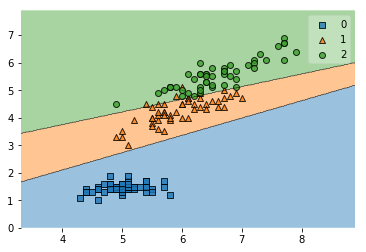

In [4]:
plot_decision_regions(X=np.array(df.drop(["target"], axis = 1)),
y=np.array(df["target"]),
clf=clf)

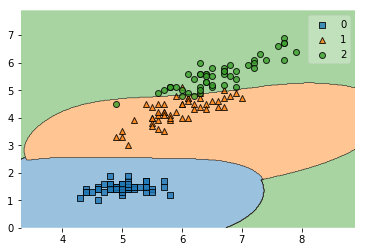

In [5]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf")
clf = clf.fit(df.drop(["target"], axis = 1), df["target"])
plot_decision_regions(X=np.array(df.drop(["target"], axis = 1)),
y=np.array(df["target"]),
clf=clf)

In [7]:
from numpy import random
# 可以用 numpy 快速產生隨機, 第一個參數是你產生有多少種類
# 第二個參數是你要幾個
# x1 是我們的第一特徵, 你可以想像成帥
# x2 是我們的第二特徵, 你可以想像成有才華
x1 = random.choice([True, False], 100)
x2 = random.choice([True, False], 100)
# y 是我們的 target, 你可以想像成會不會喜歡
y = np.logical_xor(x1, x2)
df = pd.DataFrame(columns = ["x1", "x2", "y"])
df["x1"] = x1
df["x2"] = x2
df["y"] = y
df = df.astype(int)
df

,x1,x2,y
0,0,1,1
1,1,1,0
2,1,0,1
3,0,1,1
4,0,1,1
5,1,1,0
6,0,0,0
...,...,...,...
93,1,0,1
94,1,1,0


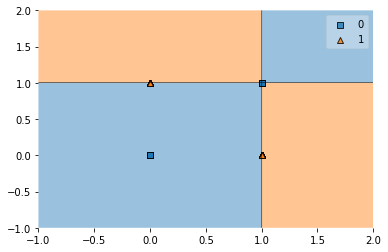

In [8]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
clf = SVC(kernel="rbf")
clf = clf.fit(df.drop(["y"], axis = 1), df["y"])
plot_decision_regions(X=np.array(df.drop(["y"], axis = 1)),
y=np.array(df["y"]),
clf=clf)